In [89]:
from qiskit import QuantumCircuit, Aer, execute
from qiskit.circuit.library import PauliEvolutionGate
from qiskit.quantum_info import Operator
from qiskit.opflow import X, Y, I
import numpy as np
from scipy.linalg import expm
import matplotlib.pyplot as plt
simulator = Aer.get_backend('statevector_simulator')

In [51]:
def statevector_to_probabilities(state_vector):
    # Dictionary to store bitstring and corresponding probability
    probabilities = {}

    # Number of qubits can be determined from the length of the state vector
    num_qubits = int(np.log2(len(state_vector)))

    # Iterate over all elements of the state vector
    for index, amplitude in enumerate(state_vector):
        # Convert index to binary string (bitstring)
        bitstring = format(index, f'0{num_qubits}b')

        # Calculate the probability (square of the amplitude's magnitude)
        probability = np.abs(amplitude) ** 2

        # Add the bitstring and its probability to the dictionary
        probabilities[bitstring] = probability

    return probabilities

In [116]:
qc = QuantumCircuit(2)
qc.x(0)
state_vector = np.array(execute(qc, simulator).result().get_statevector())
statevector_to_probabilities(state_vector=state_vector)

{'00': 0.0, '01': 1.0, '10': 0.0, '11': 0.0}

In [117]:
theta_i = 1
xx_term = theta_i * (X ^ X)
yy_term = theta_i * (Y ^ Y)
hamiltonian = xx_term + yy_term


In [127]:
stepsize=0.0001
N_steps = 55000
H = np.array(Operator(hamiltonian))

_10_, _01_ = [], []
for i in range(0,N_steps+1):
    t = (stepsize*i)
    U = expm(-1j*t*H)
    prob_dict = statevector_to_probabilities(U@state_vector)
    _10_.append(prob_dict['10'])
    _01_.append(prob_dict['01'])

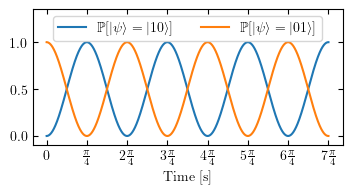

In [132]:
plt.rc("font", family=["Helvetica", "Arial"])
plt.rc("text", usetex=True)
plt.rcParams['text.latex.preamble'] = r'\usepackage{amsmath}\usepackage{amssymb}\usepackage{physics}'
plt.rc("xtick", top=True, direction="in")
plt.rc("ytick", right=True, direction="in")

fig,ax = plt.subplots(1,1,figsize=(4,2))
fig.subplots_adjust(bottom=0.2)


time = [stepsize*i for i in range(0,N_steps+1)]
ax.plot(time, _10_, label=r'$\mathbb{P}[\ket{\psi}=\ket{10}]$')
ax.plot(time, _01_, label=r'$\mathbb{P}[\ket{\psi}=\ket{01}]$')
ax.set_xlabel(r'Time [s]')
ax.set_ylim(-0.1,1.35)
ax.legend(loc='upper center',ncols=2)
ax.set_xticks([0]+[np.pi/4*i for i in range(1,8)])
ax.set_xticklabels(['0']+[r'$\frac{\pi}{4}$']+[f'{i}'+r'$\frac{\pi}{4}$' for i in range(2,8)])
plt.savefig('swap_test.png', dpi=300)
plt.show()

In [103]:
qc = QuantumCircuit(3)
qc.x(2)
state_vector = np.array(execute(qc, simulator).result().get_statevector())
statevector_to_probabilities(state_vector=state_vector)

{'000': 0.0,
 '001': 0.0,
 '010': 0.0,
 '011': 0.0,
 '100': 1.0,
 '101': 0.0,
 '110': 0.0,
 '111': 0.0}

In [104]:
H_1, H_2 = np.array(Operator((X ^ X ^ I) + (Y ^ Y ^ I))), np.array(Operator((I ^ X ^ X) + (I ^ Y ^ Y)))

stepsize=0.0001
N_steps = 100000

_100_, _010_, _001_ = [], [], []
for i in range(0,N_steps+1):
    t = (stepsize*i)
    #U_1, U_2 = expm(-1j*t*H_1), expm(-1j*t*H_2)
    #prob_dict = statevector_to_probabilities(U_2@(U_1@state_vector))
    U = expm(-1j*t*(H_1+H_2))
    prob_dict = statevector_to_probabilities(U@state_vector)
    _100_.append(prob_dict['100'])
    _010_.append(prob_dict['010'])
    _001_.append(prob_dict['001'])

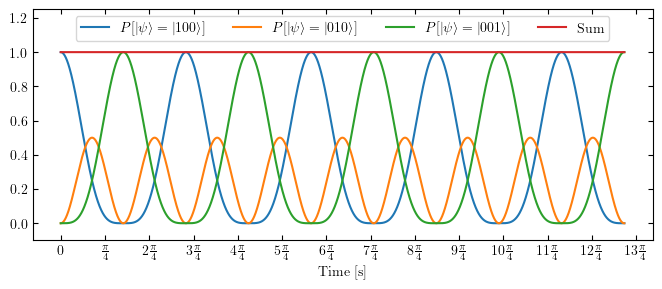

In [113]:
plt.rc("font", family=["Helvetica", "Arial"])
plt.rc("text", usetex=True)
plt.rcParams['text.latex.preamble'] = r'\usepackage{amsmath}\usepackage{amssymb}\usepackage{physics}'
plt.rc("xtick", top=True, direction="in")
plt.rc("ytick", right=True, direction="in")

fig,ax = plt.subplots(1,1,figsize=(8,3))
time = [stepsize*i for i in range(0,N_steps+1)]
ax.plot(time, _100_, label=r'$P[\ket{\psi}=\ket{100}]$')
ax.plot(time, _010_, label=r'$P[\ket{\psi}=\ket{010}]$')
ax.plot(time, _001_, label=r'$P[\ket{\psi}=\ket{001}]$')
ax.plot(time, np.array(_100_)+np.array(_010_)+np.array(_001_),label=r'Sum')
ax.set_xlabel(r'Time [s]')
ax.set_ylim(-0.1,1.25)
ax.legend(loc='upper center',ncols=4)
ax.set_xticks([0]+[np.pi/4*i for i in range(1,14)])
ax.set_xticklabels(['0']+[r'$\frac{\pi}{4}$']+[f'{i}'+r'$\frac{\pi}{4}$' for i in range(2,14)])
plt.show()